In [343]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [379]:
data = pd.read_csv('Argentina Well Data Science Challenge_M.csv', encoding='latin-1')

In [345]:
data

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,4.435899e+05
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,2.592238e+05
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,2.178866e+06
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,NaN,NaN,NaN,Agrio,Unassigned,Mendoza,1.269930e+06
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,1.651346e+06
5,8.799000e+13,V,CHSx-1,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.404017,-69.001439,14819.0,2/7/1986,5/21/1986,NaN,Unassigned,Unassigned,Mendoza,1.697034e+06
6,8.799000e+13,UN,PPCx-1004,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.359347,-68.963569,11991.0,NaN,NaN,NaN,Barrancas,Unassigned,Mendoza,1.810493e+06
7,8.799000e+13,V,S-148,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488560,5095.0,1/15/2001,1/26/2001,3/23/2001,Unassigned,Unassigned,Mendoza,7.331553e+05
8,8.799000e+13,V,S-117,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.040430,-69.406200,3677.0,9/4/1995,9/16/1995,9/24/1995,Unassigned,Unassigned,Mendoza,4.010794e+05
9,8.799000e+13,V,S-131,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.048390,-69.407210,3740.0,1/29/1997,2/6/1997,2/13/1997,Unassigned,Unassigned,Mendoza,3.750757e+05


In [107]:
data_prep = data.dropna(subset=['Measured_Depth','Drilling_Start','Drilling_end','Completion_Date'])
data_prep['Drilling_Start'] = pd.to_datetime(data_prep['Drilling_Start'])
data_prep['Drilling_end'] = pd.to_datetime(data_prep['Drilling_end'])
data_prep['Completion_Date'] = pd.to_datetime(data_prep['Completion_Date'])

/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [108]:
data_prep['Drilling_Time'] = (data_prep['Drilling_end'] - data_prep['Drilling_Start']).dt.days
data_prep['Completion_Time'] = (data_prep['Completion_Date'] - data_prep['Drilling_end']).dt.days
data_prep['DrillandComp_Time'] = (data_prep['Completion_Date'] - data_prep['Drilling_Start']).dt.days
data_prep['Time_Fraction_Drilling'] = data_prep['Drilling_Time'] / data_prep['DrillandComp_Time']
data_prep['Time_Fraction_Completion'] = data_prep['Completion_Time'] / data_prep['DrillandComp_Time']
data_prep['Penetration_Rate'] = (data_prep['Measured_Depth'])/(data_prep['Drilling_Time'])
data_prep['Cost_per_Meter'] = data_prep['well_cost']/data_prep['Measured_Depth']
data_prep['Avg_Daily_Cost'] = data_prep['Penetration_Rate'] * data_prep['Cost_per_Meter']

/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hsienhaohsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [109]:
data_prep

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,...,state_name,well_cost,Drilling_Time,Completion_Time,DrillandComp_Time,Time_Fraction_Drilling,Time_Fraction_Completion,Penetration_Rate,Cost_per_Meter,Avg_Daily_Cost
7,8.799000e+13,V,S-148,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488560,5095.0,2001-01-15,2001-01-26,...,Mendoza,7.331553e+05,11,56,67,0.164179,0.835821,463.181818,143.897019,6.665048e+04
8,8.799000e+13,V,S-117,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.040430,-69.406200,3677.0,1995-09-04,1995-09-16,...,Mendoza,4.010794e+05,12,8,20,0.600000,0.400000,306.416667,109.077890,3.342328e+04
9,8.799000e+13,V,S-131,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.048390,-69.407210,3740.0,1997-01-29,1997-02-06,...,Mendoza,3.750757e+05,8,7,15,0.533333,0.466667,467.500000,100.287629,4.688447e+04
10,8.799000e+13,V,S-145,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.969010,-69.520230,5577.0,2000-06-09,2000-06-22,...,Mendoza,7.096729e+05,13,16,29,0.448276,0.551724,429.000000,127.249944,5.459023e+04
11,8.799000e+13,V,S-148,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488850,5095.0,2001-01-15,2001-01-26,...,Mendoza,6.884307e+05,11,56,67,0.164179,0.835821,463.181818,135.118887,6.258461e+04
12,8.799000e+13,V,e-2,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.966040,-69.502770,5741.0,1987-11-13,1988-01-05,...,Mendoza,5.916198e+05,53,32,85,0.623529,0.376471,108.320755,103.051701,1.116264e+04
13,8.799000e+13,V,a-4,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.022880,-69.417430,4714.0,1973-12-01,1973-12-28,...,Mendoza,3.735704e+05,27,24,51,0.529412,0.470588,174.592593,79.247014,1.383594e+04
14,8.799010e+13,V,S-38,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.002980,-69.487940,5055.0,1987-05-10,1987-06-09,...,Mendoza,4.816170e+05,30,39,69,0.434783,0.565217,168.500000,95.275377,1.605390e+04
15,8.799010e+13,V,a-20,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.993370,-69.501960,5882.0,1976-05-15,1976-06-15,...,Mendoza,5.049451e+05,31,29,60,0.516667,0.483333,189.741935,85.845812,1.628855e+04
16,8.799010e+13,V,a-12,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.054660,-69.382520,4442.0,1974-10-01,1974-10-20,...,Mendoza,3.315529e+05,19,59,78,0.243590,0.756410,233.789474,74.640460,1.745015e+04


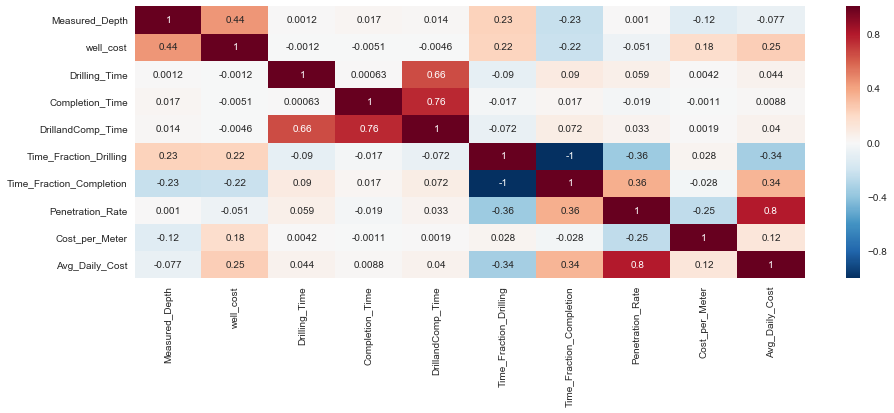

In [110]:
features_to_use = ['Measured_Depth','well_cost','Drilling_Time','Completion_Time','DrillandComp_Time',
                   'Time_Fraction_Drilling','Time_Fraction_Completion','Penetration_Rate','Cost_per_Meter',
                   'Avg_Daily_Cost']
features = data_prep[features_to_use]
# quick correlation heatmap
# plot the heatmap and annotation on it
corr = round(features.corr(),5)
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, annot = True)

In [333]:
data_Well_type_code = data_prep.groupby('Well type code')['Cost_per_Meter','Avg_Daily_Cost',]
df_Well_type_code = data_Well_type_code.corr().fillna(0).iloc[0::2,-1]
for i in range(df_Well_type_code.size):
    if df_Well_type_code[i] >= 1:
        df_Well_type_code[i] = 0.9999999999999999
    elif df_Well_type_code[i] <= -1:
        df_Well_type_code[i] = -0.9999999999999999
fisher_z_Well_type_code = np.arctanh(df_Well_type_code)
w_r_Well_type_code = np.average(fisher_z_Well_type_code, weights = data_Well_type_code.count().iloc[:,0])
np.tanh(w_r_Well_type_code)

0.17114810504491434

In [327]:
data_well_number = data_prep.groupby('well_number')['Cost_per_Meter','Avg_Daily_Cost',]
df_well_number = data_well_number.corr().fillna(0).iloc[0::2,-1]
for i in range(df_well_number.size):
    if df_well_number[i] >= 1:
        df_well_number[i] = 0.9999999999999999
    elif df_well_number[i] <= -1:
        df_well_number[i] = -0.9999999999999999
fisher_z_well_number = np.arctanh(df_well_number)
w_r_well_number = np.average(fisher_z_well_number, weights = data_well_number.count().iloc[:,0])
np.tanh(w_r_well_number)

0.71826149894773572

In [328]:
data_Field_Name = data_prep.groupby('Field_Name')['Cost_per_Meter','Avg_Daily_Cost',]
df_Field_Name = data_Field_Name.corr().fillna(0).iloc[0::2,-1]
for i in range(df_Field_Name.size):
    if df_Field_Name[i] >= 1:
        df_Field_Name[i] = 0.9999999999999999
    elif df_Field_Name[i] <= -1:
        df_Field_Name[i] = -0.9999999999999999
fisher_z_Field_Name = np.arctanh(df_Field_Name)
w_r_Field_Name = np.average(fisher_z_Field_Name, weights = data_Field_Name.count().iloc[:,0])
np.tanh(w_r_Field_Name)

0.86713593383146825

In [329]:
data_Operater = data_prep.groupby('Operator')['Cost_per_Meter','Avg_Daily_Cost',]
df_Operater = data_Operater.corr().fillna(0).iloc[0::2,-1]
for i in range(df_Operater.size):
    if df_Operater[i] >= 1:
        df_Operater[i] = 0.9999999999999999
    elif df_Operater[i] <= -1:
        df_Operater[i] = -0.9999999999999999
fisher_z_Operater = np.arctanh(df_Operater)
w_r_Operater = np.average(fisher_z_Operater, weights = data_Operater.count().iloc[:,0])
np.tanh(w_r_Operater)

0.63623554691414919

In [330]:
data_Reservoir = data_prep.groupby('Reservoir')['Cost_per_Meter','Avg_Daily_Cost',]
df = data_Reservoir.corr().fillna(0).iloc[0::2,-1]
for i in range(df.size):
    if df[i] >= 1:
        df[i] = 0.9999999999999999
    elif df[i] <= -1:
        df[i] = -0.9999999999999999
fisher_z_Reservoir = np.arctanh(df)
w_r_Reservoir = np.average(fisher_z_Reservoir, weights = data_Reservoir.count().iloc[:,0])
np.tanh(w_r_Reservoir)

0.7309887195712037

In [331]:
data_play_name= data_prep.groupby('play_name')['Cost_per_Meter','Avg_Daily_Cost',]
fisher_z_play_name = np.arctanh(data_play_name.corr().iloc[0::2,-1])
w_r_play_name = np.average(fisher_z_play_name, weights = data_play_name.count().iloc[:,0])
np.tanh(w_r_play_name)

0.12338125899765774

In [332]:
data_state_name = data_prep.groupby('state_name')['Cost_per_Meter','Avg_Daily_Cost',]
fisher_z_state_name = np.arctanh(data_state_name.corr().iloc[0::2,-1])
w_r_state_name = np.average(fisher_z_state_name, weights = data_state_name.count().iloc[:,0])
np.tanh(w_r_state_name)

0.63000489210060406

In [380]:
data['Drilling_Start'] = pd.to_datetime(data['Drilling_Start'])
data['Drilling_end'] = pd.to_datetime(data['Drilling_end'])
data['Completion_Date'] = pd.to_datetime(data['Completion_Date'])
data['Drilling_Time'] = (data['Drilling_end'] - data['Drilling_Start']).dt.days
data['Completion_Time'] = (data['Completion_Date'] - data['Drilling_end']).dt.days

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost,Drilling_Time,Completion_Time
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,NaT,NaT,NaT,Unassigned,Unassigned,Mendoza,4.435899e+05,NaN,NaN
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,NaT,NaT,NaT,Unassigned,Unassigned,Mendoza,2.592238e+05,NaN,NaN
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,NaT,NaT,NaT,Unassigned,Unassigned,Mendoza,2.178866e+06,NaN,NaN
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,NaT,NaT,NaT,Agrio,Unassigned,Mendoza,1.269930e+06,NaN,NaN
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,NaT,NaT,NaT,Unassigned,Unassigned,Mendoza,1.651346e+06,NaN,NaN
5,8.799000e+13,V,CHSx-1,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.404017,-69.001439,14819.0,1986-02-07,1986-05-21,NaT,Unassigned,Unassigned,Mendoza,1.697034e+06,103.0,NaN
6,8.799000e+13,UN,PPCx-1004,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.359347,-68.963569,11991.0,NaT,NaT,NaT,Barrancas,Unassigned,Mendoza,1.810493e+06,NaN,NaN
7,8.799000e+13,V,S-148,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488560,5095.0,2001-01-15,2001-01-26,2001-03-23,Unassigned,Unassigned,Mendoza,7.331553e+05,11.0,56.0
8,8.799000e+13,V,S-117,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.040430,-69.406200,3677.0,1995-09-04,1995-09-16,1995-09-24,Unassigned,Unassigned,Mendoza,4.010794e+05,12.0,8.0
9,8.799000e+13,V,S-131,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.048390,-69.407210,3740.0,1997-01-29,1997-02-06,1997-02-13,Unassigned,Unassigned,Mendoza,3.750757e+05,8.0,7.0


In [381]:
data['Drilling_Time'] = data.groupby('Field_Name')['Drilling_Time'].transform(lambda x: x.fillna(x.mean()))
data['Completion_Time'] = data.groupby('Field_Name')['Completion_Time'].transform(lambda x: x.fillna(x.mean()))
data['Measured_Depth'] = data.groupby('Field_Name')['Measured_Depth'].transform(lambda x: x.fillna(x.mean()))
data['Drilling_Time'] = data.groupby('Reservoir')['Drilling_Time'].transform(lambda x: x.fillna(x.mean()))
data['Completion_Time'] = data.groupby('Reservoir')['Completion_Time'].transform(lambda x: x.fillna(x.mean()))
data['Measured_Depth'] = data.groupby('Reservoir')['Measured_Depth'].transform(lambda x: x.fillna(x.mean()))
data = data.drop(["Drilling_Start",'Drilling_end','Completion_Date'],1)
data

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Reservoir,play_name,state_name,well_cost,Drilling_Time,Completion_Time
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.000000,Unassigned,Unassigned,Mendoza,4.435899e+05,40.843434,36.385768
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.000000,Unassigned,Unassigned,Mendoza,2.592238e+05,40.843434,36.385768
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.000000,Unassigned,Unassigned,Mendoza,2.178866e+06,40.843434,36.385768
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.000000,Agrio,Unassigned,Mendoza,1.269930e+06,27.298214,25.687500
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.000000,Unassigned,Unassigned,Mendoza,1.651346e+06,40.843434,36.385768
5,8.799000e+13,V,CHSx-1,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.404017,-69.001439,14819.000000,Unassigned,Unassigned,Mendoza,1.697034e+06,103.000000,36.385768
6,8.799000e+13,UN,PPCx-1004,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.359347,-68.963569,11991.000000,Barrancas,Unassigned,Mendoza,1.810493e+06,103.000000,21.199786
7,8.799000e+13,V,S-148,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488560,5095.000000,Unassigned,Unassigned,Mendoza,7.331553e+05,11.000000,56.000000
8,8.799000e+13,V,S-117,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.040430,-69.406200,3677.000000,Unassigned,Unassigned,Mendoza,4.010794e+05,12.000000,8.000000
9,8.799000e+13,V,S-131,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.048390,-69.407210,3740.000000,Unassigned,Unassigned,Mendoza,3.750757e+05,8.000000,7.000000


In [382]:
data['DrillandComp_Time'] = data['Completion_Time'] + data['Drilling_Time']
data['Time_Fraction_Drilling'] = data['Drilling_Time'] / data['DrillandComp_Time']
data['Time_Fraction_Completion'] = data['Completion_Time'] / data['DrillandComp_Time']
data['Penetration_Rate'] = (data['Measured_Depth'])/(data['Drilling_Time'])
data['Cost_per_Meter'] = data['well_cost']/data['Measured_Depth']
data['Avg_Daily_Cost'] = data['Penetration_Rate'] * data['Cost_per_Meter']
data = data.drop(['Well ID','well_number','play_name'],1)
data

,Well type code,Field_Name,Operator,latitude,longitude,Measured_Depth,Reservoir,state_name,well_cost,Drilling_Time,Completion_Time,DrillandComp_Time,Time_Fraction_Drilling,Time_Fraction_Completion,Penetration_Rate,Cost_per_Meter,Avg_Daily_Cost
0,UN,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.000000,Unassigned,Mendoza,4.435899e+05,40.843434,36.385768,77.229202,0.528860,0.471140,100.309880,108.271876,1.086074e+04
1,UN,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.000000,Unassigned,Mendoza,2.592238e+05,40.843434,36.385768,77.229202,0.528860,0.471140,64.098430,99.015972,6.346768e+03
2,UN,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.000000,Unassigned,Mendoza,2.178866e+06,40.843434,36.385768,77.229202,0.528860,0.471140,383.782614,139.002608,5.334678e+04
3,UN,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.000000,Agrio,Mendoza,1.269930e+06,27.298214,25.687500,52.985714,0.515200,0.484800,407.279388,114.222913,4.652064e+04
4,UN,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.000000,Unassigned,Mendoza,1.651346e+06,40.843434,36.385768,77.229202,0.528860,0.471140,293.976258,137.531977,4.043114e+04
5,V,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.404017,-69.001439,14819.000000,Unassigned,Mendoza,1.697034e+06,103.000000,36.385768,139.385768,0.738956,0.261044,143.873786,114.517465,1.647606e+04
6,UN,Puesto Pozo Cercado (PCE),Chanares Herrados,-33.359347,-68.963569,11991.000000,Barrancas,Mendoza,1.810493e+06,103.000000,21.199786,124.199786,0.829309,0.170691,116.417476,150.987662,1.757760e+04
7,V,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-34.991670,-69.488560,5095.000000,Unassigned,Mendoza,7.331553e+05,11.000000,56.000000,67.000000,0.164179,0.835821,463.181818,143.897019,6.665048e+04
8,V,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.040430,-69.406200,3677.000000,Unassigned,Mendoza,4.010794e+05,12.000000,8.000000,20.000000,0.600000,0.400000,306.416667,109.077890,3.342328e+04
9,V,El Sosneado (ESO),Petroquimica Comodoro Rivadavia,-35.048390,-69.407210,3740.000000,Unassigned,Mendoza,3.750757e+05,8.000000,7.000000,15.000000,0.533333,0.466667,467.500000,100.287629,4.688447e+04


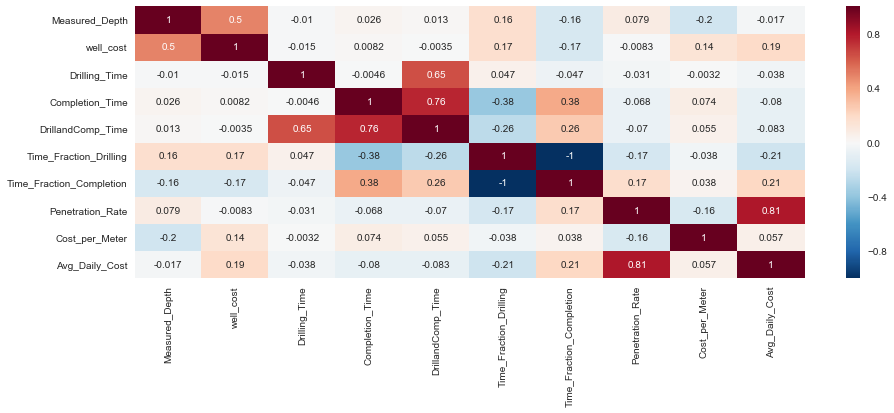

In [383]:
features_to_use = ['Measured_Depth','well_cost','Drilling_Time','Completion_Time','DrillandComp_Time',
                   'Time_Fraction_Drilling','Time_Fraction_Completion','Penetration_Rate','Cost_per_Meter',
                   'Avg_Daily_Cost']
features = data[features_to_use]
# quick correlation heatmap
# plot the heatmap and annotation on it
corr = round(features.corr(),5)
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, annot = True)